In [2]:
import pandas as pd
import json

def filter_complete_ec(row):
    ec_list = row['EC number'].split('; ')
    flag = False
    for ec in ec_list:
        if '-' not in ec:
            flag = True
            break
    return flags

def remove_incomplete_ec(s):
    ec_list = s.split('; ')
    ec_list = [ec for ec in ec_list if '-' not in ec]
    return ';'.join(ec_list)

df = pd.read_csv('../data/swissprot/swissprot.tsv', sep='\t')
df_ec = df[df['EC number'].notnull()]
df_ec_complete = df_ec[df_ec.apply(filter_complete_ec, axis=1)]
df_ec_complete['EC number'] = df_ec_complete['EC number'].apply(remove_incomplete_ec)
df_save = df_ec_complete[['Entry', 'EC number']]
display(df_save)
df_save.to_csv('../data/ec/swissprot_complete_ec.csv', index=False)

/tmp/ipykernel_1182704/2327385157.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ec_complete['EC number'] = df_ec_complete['EC number'].apply(remove_incomplete_ec)


,Entry,EC number
0,A0A009IHW8,3.2.2.6
1,A0A023I7E1,3.2.1.39
2,A0A024B7W1,2.1.1.56;2.1.1.57;2.7.7.48;3.4.21.91;3.6.1.15;...
3,A0A024SC78,3.1.1.74
4,A0A024SH76,3.2.1.91
...,...,...
564325,Q6L032,3.5.4.2
565323,Q7TDB6,2.7.7.48
565806,Q85055,2.7.7.48
568265,Q94MV8,3.6.1.12


In [3]:
ec_list = df_save['EC number'].tolist()
ec_list = ';'.join(ec_list)
ec_list = ec_list.split(';')
ec_list = list(set(ec_list))
ec_list = sorted(ec_list)
print(len(ec_list))
with open('../data/ec/swissprot_ec_list.json', 'w') as f:
    json.dump(ec_list, f)

5521


<Axes: >

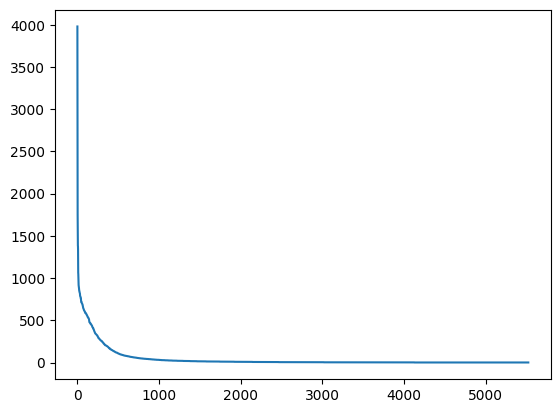

In [13]:
import pandas as pd
import json
import seaborn as sns

df = pd.read_csv('../data/ec/swissprot_complete_ec.csv')
pid2ec = {}
for i, row in df.iterrows():
    pid = row['Entry']
    ec_list = row['EC number'].split(';')
    pid2ec[pid] = ec_list
with open('../data/ec/swissprot_ec_list.json') as f:
    ec_list = json.load(f)
ec2num_proteins = {}
for pid, ecs in pid2ec.items():
    for ec in ecs:
        if ec not in ec2num_proteins:
            ec2num_proteins[ec] = 0
        ec2num_proteins[ec] += 1
num_proteins = list(ec2num_proteins.values())
num_proteins = sorted(num_proteins, reverse=True)
sns.lineplot(x=range(len(num_proteins)), y=num_proteins)

In [14]:
import numpy as np
num_proteins = np.array(num_proteins)
(num_proteins <=2).sum(), num_proteins

(2052, array([3979, 2642, 2150, ...,    1,    1,    1]))

[3.59977394 3.42193281 3.33243846 ... 0.         0.         0.        ]


<Axes: >

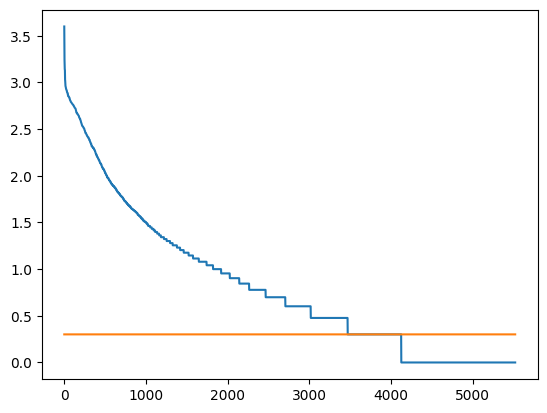

In [17]:
num_proteins_log = np.log10(num_proteins)
print(num_proteins_log)
sns.lineplot(x=range(len(num_proteins_log)), y=num_proteins_log)
sns.lineplot(x=range(len(num_proteins_log)), y=[np.log10(2)]*len(num_proteins_log))

In [1]:
import torch

pid2emb = {}
for i in range(4):
    pid2emb.update(torch.load(f'../data/embeddings/sprot_10_1022_esm2_t33_batch_{i}.pt'))
len(pid2emb)

551965

In [2]:
torch.save(pid2emb, '../data/embeddings/sprot_10_1022_esm2_t33.pt')

In [5]:
clean_pid2emb = {}
for cpid, emb in pid2emb.items():
    pid = cpid.split('|')[1]
    clean_pid2emb[pid] = emb
torch.save(clean_pid2emb, '../data/embeddings/sprot_10_1022_esm2_t33.pt')
clean_pid2emb

{'Q6GZX4': tensor([ 0.0449, -0.0647, -0.0164,  ...,  0.0152, -0.0291, -0.0010]),
 'Q6GZX3': tensor([ 0.0219, -0.0493, -0.0559,  ..., -0.0569, -0.0071,  0.0337]),
 'Q197F8': tensor([ 0.0410, -0.0037, -0.0130,  ..., -0.0994,  0.0177, -0.0381]),
 'Q197F7': tensor([ 0.0143,  0.0200,  0.0351,  ..., -0.1122, -0.0538,  0.0399]),
 'Q6GZX2': tensor([ 0.0462, -0.1176,  0.0031,  ...,  0.0024, -0.0539,  0.0144]),
 'Q6GZX1': tensor([ 0.0484, -0.0089, -0.0007,  ..., -0.0327, -0.0955, -0.0372]),
 'Q197F5': tensor([ 0.0217,  0.0047,  0.0139,  ..., -0.1305, -0.0308, -0.0203]),
 'Q6GZX0': tensor([ 0.0612, -0.0272, -0.0022,  ..., -0.0596, -0.0565,  0.0861]),
 'Q91G88': tensor([ 0.0709, -0.0162,  0.0446,  ..., -0.0352, -0.0045,  0.0712]),
 'Q6GZW9': tensor([ 0.0126,  0.0257, -0.0385,  ..., -0.0494, -0.0453, -0.0419]),
 'Q6GZW8': tensor([-0.0119,  0.0210, -0.0037,  ...,  0.0564,  0.0129,  0.1129]),
 'Q197F3': tensor([ 0.0286, -0.0146, -0.0272,  ..., -0.0799, -0.0447, -0.0430]),
 'Q197F2': tensor([ 0.0855, 

In [4]:
import json
import pandas as pd

with open('../data/ec/swissprot_ec_list.json') as f:
    ec_list = json.load(f)
df = pd.read_csv('../data/ec/swissprot_complete_ec.csv')
ec2pid = {}
for i, row in df.iterrows():
    pid = row['Entry']
    ecs = row['EC number'].split(';')
    for ec in ecs:
        if ec not in ec2pid:
            ec2pid[ec] = []
        ec2pid[ec].append(pid)
ec_list_above_10 = [ec for ec in ec_list if len(ec2pid[ec]) >= 10]
print(len(ec_list_above_10))
with open('../data/ec/swissprot_ec_list_above_10.json', 'w') as f:
    json.dump(ec_list_above_10, f)

1920


In [2]:
import torch
import json
import pandas as pd

with open('../data/ec/swissprot_ec_list_above_10.json') as f:
    ec_list_above_10 = json.load(f)
df = pd.read_csv('../data/ec/swissprot_complete_ec.csv')
pid2ec = {}
for i, row in df.iterrows():
    pid = row['Entry']
    ecs = row['EC number'].split(';')
    pid2ec[pid] = []
    for ec in ecs:
        if ec in ec_list_above_10:
            pid2ec[pid].append(ec)
print(f'pid2ec: {len(pid2ec)}')
pid2emb = torch.load('../data/embeddings/sprot_10_1022_esm2_t33.pt')
print(f'pid2emb: {len(pid2emb)}')
all_data = {}
for pid in pid2ec:
    if pid in pid2emb:
        all_data[pid] = {'embedding': pid2emb[pid], 'ec': pid2ec[pid]}
print(f'all_data: {len(all_data)}')
torch.save(all_data, '../data/embeddings/sprot_10_1022_esm2_t33_ec_above_10.pt')

pid2ec: 236104
pid2emb: 551965
all_data: 228551


In [3]:
all_data_pids = list(all_data.keys())
print(all_data_pids[:5])    

['A0A009IHW8', 'A0A023I7E1', 'A0A024SC78', 'A0A024SH76', 'A0A044RE18']


In [1]:
import torch
import random

random.seed(42)
all_data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10.pt')
print(f'all_data: {len(all_data)}')
all_data_pids = list(all_data.keys())
random.shuffle(all_data_pids)
train_pids = all_data_pids[:int(0.8*len(all_data_pids))]
val_pids = all_data_pids[int(0.8*len(all_data_pids)):int(0.9*len(all_data_pids))]
test_pids = all_data_pids[int(0.9*len(all_data_pids)):]

train_data = {pid: all_data[pid] for pid in train_pids}
val_data = {pid: all_data[pid] for pid in val_pids}
test_data = {pid: all_data[pid] for pid in test_pids}
print(f'train_data: {len(train_data)}, val_data: {len(val_data)}, test_data: {len(test_data)}')
torch.save(train_data, '../data/embeddings/sprot_10_1022_esm2_t33_ec_above_10_train.pt')
torch.save(val_data, '../data/embeddings/sprot_10_1022_esm2_t33_ec_above_10_val.pt')
torch.save(test_data, '../data/embeddings/sprot_10_1022_esm2_t33_ec_above_10_test.pt')

all_data: 228551
train_data: 182840, val_data: 22855, test_data: 22856


In [3]:
import torch
import pandas as pd

data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10.pt')
print(len(data))
single_label_data = {k: v for k, v in data.items() if len(v['ec']) == 1}
print(len(single_label_data))
torch.save(single_label_data, '../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label.pt')
single_label_data_pids = list(single_label_data.keys())
train_pids = single_label_data_pids[:int(0.8*len(single_label_data_pids))]
val_pids = single_label_data_pids[int(0.8*len(single_label_data_pids)):int(0.9*len(single_label_data_pids))]
test_pids = single_label_data_pids[int(0.9*len(single_label_data_pids)):]
train_data = {pid: single_label_data[pid] for pid in train_pids}
val_data = {pid: single_label_data[pid] for pid in val_pids}
test_data = {pid: single_label_data[pid] for pid in test_pids}
print(f'train_data: {len(train_data)}, val_data: {len(val_data)}, test_data: {len(test_data)}')
torch.save(train_data, '../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_train.pt')
torch.save(val_data, '../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_val.pt')
torch.save(test_data, '../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_test.pt')

228551
208885
train_data: 167108, val_data: 20888, test_data: 20889


In [1]:
import torch

train_data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_train.pt')
ec2occurance = {}
for pid, d in train_data.items():
    for ec in d['ec']:
        if ec not in ec2occurance:
            ec2occurance[ec] = 0
        ec2occurance[ec] += 1
print(len(ec2occurance))

1795


In [2]:
test_data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_test.pt')
ec2occurance_test = {}
for pid, d in test_data.items():
    for ec in d['ec']:
        if ec not in ec2occurance_test:
            ec2occurance_test[ec] = 0
        ec2occurance_test[ec] += 1
print(len(ec2occurance_test))

760


In [3]:
ec_train = set(ec2occurance.keys())
ec_test = set(ec2occurance_test.keys())
print(len(ec_train), len(ec_test), len(ec_train.intersection(ec_test)))

1795 760 758


In [5]:
# Example dictionary
ec2occurrence = {
    'instance1': 9,
    'instance2': 5,
    'instance3': 3,
    'instance4': 4,
    'instance5': 1,
}

# Sort the dictionary by its values in descending order
sorted_ec2occurrence = dict(sorted(ec2occurrence.items(), key=lambda item: item[1], reverse=True))

print(sorted_ec2occurrence)


{'instance1': 9, 'instance2': 5, 'instance4': 4, 'instance3': 3, 'instance5': 1}


In [5]:
import json
import torch
import numpy as np
import matplotlib.pyplot as plt

with open('../data/ec/swissprot_ec_list.json') as f:
    ec_list = json.load(f)
ec_list_level3 = [ec[:5] for ec in ec_list]
ec_list_level3 = list(set(ec_list_level3))
ec_list_level2 = [ec[:3] for ec in ec_list]
ec_list_level2 = list(set(ec_list_level2))
print(len(ec_list_level3), len(ec_list_level2))
print(ec_list_level3[:5], ec_list_level2[:5])

data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label.pt')
pid2ec = {k: v['ec'] for k, v in data.items()}
print(len(pid2ec))
pid2ec_level3 = {k: [ec[:5] for ec in v] for k, v in pid2ec.items()}
pid2ec_level2 = {k: [ec[:3] for ec in v] for k, v in pid2ec.items()}
print(list(pid2ec_level2.values())[:10])

ec2occurance_level3 = {}
for pid, ecs in pid2ec_level3.items():
    for ec in ecs:
        if ec not in ec2occurance_level3:
            ec2occurance_level3[ec] = 0
        ec2occurance_level3[ec] += 1
occurances_level3 = np.array(list(ec2occurance_level3.values()))
print(f'level3: {len(ec2occurance_level3)}, {occurances_level3.max()}, {occurances_level3.min()}')

occurances_level3 = sorted(occurances_level3, reverse=True)
plt.figure(figsize=(5, 5), dpi=200)
plt.plot(occurances_level3)
plt.xlabel('EC number level 3')
plt.ylabel('Number of proteins')
plt.show()

ec2occurance_level2 = {}
for pid, ecs in pid2ec_level2.items():
    for ec in ecs:
        if ec not in ec2occurance_level2:
            ec2occurance_level2[ec] = 0
        ec2occurance_level2[ec] += 1
occurances_level2 = np.array(list(ec2occurance_level2.values()))
print(f'level2: {len(ec2occurance_level2)}, {occurances_level2.max()}, {occurances_level2.min()}')

190 56
['3.10.', '1.1.2', '1.18.', '1.1.3', '3.1.6'] ['1.7', '3.4', '4.9', '1.4', '1.5']
208885
[['3.2'], ['3.2'], ['3.1'], ['3.2'], ['2.7'], ['2.5'], ['2.5'], ['2.4'], ['2.4'], ['2.4']]
level3: 161, 12461, 1
level2: 50, 28654, 33


In [10]:
# import matplotlib.pyplot as plt
# occurances_level3 = sorted(occurances_level3, reverse=True)
# plt.figure(figsize=(5, 5), dpi=200)
# plt.plot(occurances_level3)
# plt.xlabel('EC number level 3')
# plt.ylabel('Number of proteins')
# plt.show()

(np.array(occurances_level3) < 100).sum()

43

In [11]:
with open('../data/ec/swissprot_ec_list.json') as f:
    ec_list = json.load(f)
ec_list_level3 = [ec[:5] for ec in ec_list]
ec_list_level3 = list(set(ec_list_level3))
with open('../data/ec/swissprot_ec_list_level3.json', 'w') as f:
    json.dump(ec_list_level3, f)
print(len(ec_list_level3))

190


In [4]:
from Bio import SeqIO
import torch

all_fasta = list(SeqIO.parse('../data/swissprot/uniprot_sprot.fasta', 'fasta'))
print(f'all_fasta: {len(all_fasta)}')
pid2seq = {f.id.split('|')[1]: str(f.seq) for f in all_fasta}
print(f'pid2seq: {len(pid2seq)}')
test_data = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_test.pt')
test_pid2seq = {pid: pid2seq[pid] for pid in test_data}
print(f'test_pid2seq: {len(test_pid2seq)}')
with open('../data/ec/fasta/sprot_10_1022_esm2_t33_ec_above_10_single_label_test.fasta', 'w') as f:
    for pid, seq in test_pid2seq.items():
        f.write(f'>{pid}\n{seq}\n')

all_fasta: 570830
pid2seq: 570830
test_pid2seq: 20889


In [3]:
all_fasta[0].id

'sp|Q6GZX4|001R_FRG3G'

In [2]:
import pandas as pd

data = pd.read_csv('../data/ec/swissprot_complete_ec.csv')
display(data)
ec_numbers = data['EC number'].tolist()
single_ec = []
for ec in ec_numbers:
    ecs = ec.split(';')
    single_ec.extend(ecs)
single_ec_set = set(single_ec)
ec_numbers_set = set(ec_numbers)
print(len(ec_numbers_set), len(single_ec_set))

,Entry,EC number
0,A0A009IHW8,3.2.2.6
1,A0A023I7E1,3.2.1.39
2,A0A024B7W1,2.1.1.56;2.1.1.57;2.7.7.48;3.4.21.91;3.6.1.15;...
3,A0A024SC78,3.1.1.74
4,A0A024SH76,3.2.1.91
...,...,...
236099,Q6L032,3.5.4.2
236100,Q7TDB6,2.7.7.48
236101,Q85055,2.7.7.48
236102,Q94MV8,3.6.1.12


6218 5521


In [3]:
import torch

ecdata = torch.load('../data/ec/sprot_10_1022_esm2_t33_ec_above_10_single_label_test.pt')
ecdata

{'Q1J956': {'embedding': tensor([ 0.0389, -0.1237,  0.0436,  ..., -0.1054, -0.0217, -0.0281]),
  'ec': ['3.1.1.29']},
 'Q1J963': {'embedding': tensor([ 0.0165, -0.0893,  0.0538,  ..., -0.0924, -0.0191, -0.0272]),
  'ec': ['2.1.1.177']},
 'Q1J9B9': {'embedding': tensor([-0.0503, -0.0898, -0.0034,  ..., -0.1503, -0.0242,  0.0902]),
  'ec': ['6.1.1.19']},
 'Q1J9F2': {'embedding': tensor([ 0.0041,  0.0207, -0.0108,  ..., -0.0483,  0.0404,  0.0780]),
  'ec': ['6.3.4.3']},
 'Q1J9R7': {'embedding': tensor([ 0.0008, -0.0794,  0.0169,  ..., -0.1478,  0.0256,  0.0725]),
  'ec': ['3.5.1.88']},
 'Q1J9U7': {'embedding': tensor([ 0.0439,  0.0051, -0.0034,  ..., -0.1973,  0.0190, -0.0084]),
  'ec': ['5.3.1.26']},
 'Q1J9U8': {'embedding': tensor([-0.0064, -0.0496,  0.0553,  ..., -0.1542, -0.0663, -0.0136]),
  'ec': ['2.7.1.144']},
 'Q1J9V2': {'embedding': tensor([-0.0015, -0.0724, -0.0564,  ..., -0.1597, -0.0301,  0.0546]),
  'ec': ['3.2.1.85']},
 'Q1J9Y4': {'embedding': tensor([ 0.0348, -0.1162, -0.0